In [ ]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
model = ChatOpenAI(model="gpt-4o")

In [ ]:
# state
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    b_per: float

    summary: str

In [13]:
# Functions

def calculate_sr(state: BatsmanState):
    sr = (state['runs']/state['balls'])*100
    return {'sr': sr}


def calculate_bpb(state: BatsmanState):
    bpb = state['balls']/(state['fours']+state['sixes'])
    return {'bpb': bpb}


def calculate_b_per(state: BatsmanState):
    b_per = ((state['fours']*4+state['sixes']*6)/state['runs'])*100
    return {'b_per': b_per}


def summary(state: BatsmanState) -> BatsmanState:
    summary = f"""
        Strike Rate - {state['sr']} \n
        Balls per Boundry - {state['bpb']} \n
        Boundry Percentage - {state['b_per']}
        """
    state['summary'] = summary
    return state

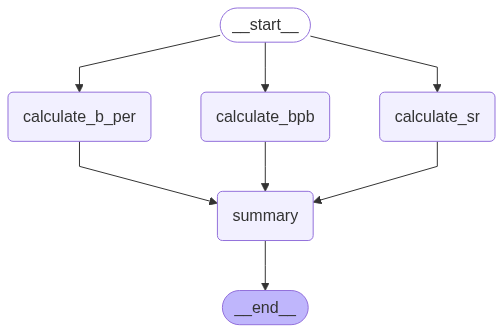

In [14]:
# graphs
graphs = StateGraph(BatsmanState)

# nodes
graphs.add_node('calculate_sr', calculate_sr)
graphs.add_node('calculate_bpb', calculate_bpb)
graphs.add_node('calculate_b_per', calculate_b_per)
graphs.add_node('summary', summary)

# edges
graphs.add_edge(START, 'calculate_sr')
graphs.add_edge(START, 'calculate_bpb')
graphs.add_edge(START, 'calculate_b_per')
graphs.add_edge('calculate_sr', 'summary')
graphs.add_edge('calculate_bpb', 'summary')
graphs.add_edge('calculate_b_per', 'summary')
graphs.add_edge('summary', END)
# compile

workflow = graphs.compile()
workflow

In [15]:
initial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}
final_state = workflow.invoke(initial_state)
final_state

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'b_per': 48.0,
 'summary': '\n        Strike Rate - 200.0 \n\n        Balls per Boundry - 5.0 \n\n        Boundry Percentage - 48.0\n        '}